In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.keras.preprocessing.image_dataset_from_directory?

Signature:
tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Docstring:
Generates a `tf.data.Dataset` from image files in a directory.

If your directory structure is:

```
main_directory/
...class_a/
......a_image_1.jpg
......a_image_2.jpg
...class_b/
......b_image_1.jpg
......b_image_2.jpg
```

Then calling `image_dataset_from_directory(main_directory,
labels='inferred')` will return a `tf.data.Dataset` that yields batches of
images from the subdirectories `class_a` and `class_b`, together with labels
0 and 1 (0 corresponding to `class_a` and 1 corresponding to `class_b`).

Supported image formats: jpeg, png, bmp, gif.
Animated gifs are truncated to the firs

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL = 3

In [4]:
data_set = tf.keras.preprocessing.image_dataset_from_directory("tomato DS",batch_size = BATCH_SIZE,shuffle = True, image_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 4500 files belonging to 3 classes.


In [5]:
data_set.class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [6]:
#extacting the class names
class_name = data_set.class_names

In [7]:
type(class_name)

list

In [8]:
#checking the length per batch.
len(data_set) 

141

In [9]:
# we will place 80% training data 10% test and 10% will be Validation data.
print("training dataset is :",round(141*0.8))
print("test dataset and same will be validation dataset is",round(141*0.1))

training dataset is : 113
test dataset and same will be validation dataset is 14


In [10]:
for batch_image, batch_label in data_set.take(1):
    print(batch_image.shape)
    print(batch_label.shape)

(32, 256, 256, 3)
(32,)


In [11]:
for batch_image, batch_label in data_set.take(1):
    print(batch_image[0])
    print(type(batch_image[0]))
    print(type(batch_image[0].numpy()))

tf.Tensor(
[[[134. 132. 137.]
  [135. 133. 138.]
  [136. 134. 139.]
  ...
  [124. 119. 125.]
  [123. 118. 124.]
  [121. 116. 122.]]

 [[135. 133. 138.]
  [135. 133. 138.]
  [136. 134. 139.]
  ...
  [122. 117. 123.]
  [119. 114. 120.]
  [117. 112. 118.]]

 [[136. 134. 139.]
  [136. 134. 139.]
  [137. 135. 140.]
  ...
  [119. 114. 120.]
  [116. 111. 117.]
  [115. 110. 116.]]

 ...

 [[154. 152. 153.]
  [153. 151. 152.]
  [153. 151. 152.]
  ...
  [ 76.  75.  80.]
  [ 78.  77.  82.]
  [ 80.  79.  84.]]

 [[153. 151. 152.]
  [152. 150. 151.]
  [151. 149. 150.]
  ...
  [ 76.  75.  80.]
  [ 78.  77.  82.]
  [ 79.  78.  83.]]

 [[152. 150. 151.]
  [151. 149. 150.]
  [150. 148. 149.]
  ...
  [ 76.  75.  80.]
  [ 76.  75.  80.]
  [ 78.  77.  82.]]], shape=(256, 256, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>


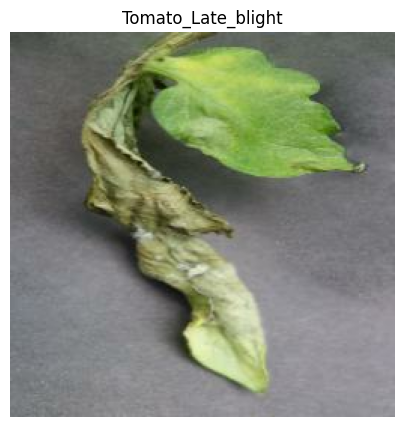

In [12]:
plt.figure(figsize=(5,5))
for image,label in data_set.take(1):
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(class_name[label[0]])
    plt.axis('off')
    plt.show()

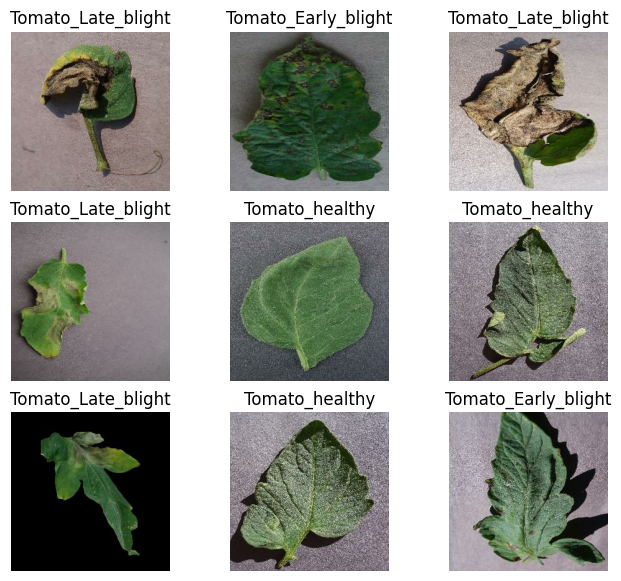

In [13]:
# multiple images
plt.figure(figsize=(8,7))
for image,label in data_set.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_name[label[i]])
        plt.axis('off')
    plt.show()

In [14]:
# now i am going to train my daataset
# 80% will be used for train
# 10% will be used for test data
# 10% will be used for validation data
training_data = data_set.take(round(len(data_set)*0.8))
testing_data = data_set.take(round(len(data_set)*0.1))
validation_data = data_set.take(round(len(data_set)*0.1))

In [15]:
len(training_data)

113

In [16]:
# checking the functionalty of cache()
training_data.cache?

Signature: training_data.cache(filename='', name=None)
Docstring:
Caches the elements in this dataset.

The first time the dataset is iterated over, its elements will be cached
either in the specified file or in memory. Subsequent iterations will
use the cached data.

Note: To guarantee that the cache gets finalized, the input dataset must be
iterated through in its entirety, until it raises StopIteration. Otherwise,
subsequent iterations may not use cached data.

>>> dataset = tf.data.Dataset.range(5)
>>> dataset = dataset.map(lambda x: x**2)
>>> dataset = dataset.cache()
>>> # The first time reading through the data will generate the data using
>>> # `range` and `map`.
>>> list(dataset.as_numpy_iterator())
[0, 1, 4, 9, 16]
>>> # Subsequent iterations read from the cache.
>>> list(dataset.as_numpy_iterator())
[0, 1, 4, 9, 16]

When caching to a file, the cached data will persist across runs. Even the
first iteration through the data will read from the cache file. Changing
the input pi

In [17]:
# let get the data for training variable because i jsut got the single number which considered as number, so i have to give data to my training + testing + validation variable.
training = training_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
testing = testing_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validations = validation_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [18]:
# check the differnce
print(type(training))
print(type(training_data))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


In [19]:
data_set.prefetch?

Signature: data_set.prefetch(buffer_size, name=None)
Docstring:
Creates a `Dataset` that prefetches elements from this dataset.

Most dataset input pipelines should end with a call to `prefetch`. This
allows later elements to be prepared while the current element is being
processed. This often improves latency and throughput, at the cost of
using additional memory to store prefetched elements.

Note: Like other `Dataset` methods, prefetch operates on the
elements of the input dataset. It has no concept of examples vs. batches.
`examples.prefetch(2)` will prefetch two elements (2 examples),
while `examples.batch(20).prefetch(2)` will prefetch 2 elements
(2 batches, of 20 examples each).

>>> dataset = tf.data.Dataset.range(3)
>>> dataset = dataset.prefetch(2)
>>> list(dataset.as_numpy_iterator())
[0, 1, 2]

Args:
  buffer_size: A `tf.int64` scalar `tf.Tensor`, representing the maximum
    number of elements that will be buffered when prefetching. If the value
    `tf.data.AUTOTUNE` is u

In [20]:
# Resize and Scaling
from tensorflow.keras.layers import experimental,Dense
resize_and_scaling = tf.keras.Sequential([
    experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
# Creating the Model
from tensorflow.keras import layers
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
model = tf.keras.models.Sequential([
    resize_and_scaling,
    layers.Conv2D(32,(3,3),input_shape =input_shape,activation="relu",padding='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu",padding='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu",padding='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu",padding='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu",padding='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu",padding='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu",padding='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu",padding='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(3,activation = 'softmax')
    
])

In [22]:
input_shape

(32, 256, 256, 3)

In [23]:
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 128, 128, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 128, 128, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 64, 64, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 64, 64, 64)         

In [25]:
# compile Model

model.compile(optimizer ='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [26]:
model.fit(training,epochs=20,batch_size=BATCH_SIZE,verbose=1,validation_data=validations)

Epoch 1/20
113/113 [==============================] - 358s 3s/step - loss: 0.9333 - accuracy: 0.5343 - val_loss: 0.5570 - val_accuracy: 0.7366
Epoch 2/20
113/113 [==============================] - 307s 3s/step - loss: 0.4774 - accuracy: 0.7898 - val_loss: 0.4057 - val_accuracy: 0.8170
Epoch 3/20
113/113 [==============================] - 301s 3s/step - loss: 0.3987 - accuracy: 0.8299 - val_loss: 0.3900 - val_accuracy: 0.8259
Epoch 4/20
113/113 [==============================] - 293s 3s/step - loss: 0.3238 - accuracy: 0.8598 - val_loss: 0.2939 - val_accuracy: 0.8616
Epoch 5/20
113/113 [==============================] - 282s 3s/step - loss: 0.2805 - accuracy: 0.8827 - val_loss: 0.2544 - val_accuracy: 0.8884
Epoch 6/20
113/113 [==============================] - 322s 3s/step - loss: 0.2374 - accuracy: 0.9007 - val_loss: 0.2413 - val_accuracy: 0.9040
Epoch 7/20
113/113 [==============================] - 333s 3s/step - loss: 0.2478 - accuracy: 0.8988 - val_loss: 0.1735 - val_accuracy: 0.9241

In [28]:
loss, accuracy = model.evaluate(testing)

14/14 [==============================] - 11s 757ms/step - loss: 0.1108 - accuracy: 0.9621


In [34]:
model.history?

Type:        History
String form: <keras.src.callbacks.History object at 0x000001CCEC66B430>
File:        c:\users\izhar\appdata\local\programs\python\python310\lib\site-packages\keras\src\callbacks.py
Docstring:  
Callback that records events into a `History` object.

This callback is automatically applied to
every Keras model. The `History` object
gets returned by the `fit` method of models.

Example:

>>> model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
>>> model.compile(tf.keras.optimizers.SGD(), loss='mse')
>>> history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
...                     epochs=10, verbose=1)
>>> print(history.params)
{'verbose': 1, 'epochs': 10, 'steps': 1}
>>> # check the keys of history object
>>> print(history.history.keys())
dict_keys(['loss'])

In [40]:
model.get_weight_paths()

{'conv2d.kernel': <tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[ 0.06237666, -0.00308905, -0.0277457 , -0.06136405,
           -0.10943684,  0.04450226, -0.10026156, -0.1247685 ,
           -0.16345638, -0.01876342, -0.08048039,  0.10182694,
            0.01534845,  0.02329061, -0.07748655,  0.08890805,
            0.07237305, -0.14681822, -0.00734742,  0.08195338,
           -0.10418838, -0.08420499,  0.03878888,  0.00143148,
           -0.08227422,  0.06247332,  0.04434335, -0.0736474 ,
           -0.05618415, -0.1257526 ,  0.02390382, -0.00736441],
          [-0.12759674,  0.06475608,  0.11052731,  0.13592908,
           -0.02903319, -0.13103092,  0.05372722,  0.11438852,
           -0.10206302, -0.02697207, -0.05619918,  0.09211525,
            0.13657536,  0.10199728,  0.06697243, -0.01883659,
            0.00888712, -0.17016846, -0.151847  ,  0.09987902,
            0.03675382,  0.00427243, -0.03959182,  0.05988337,
           -0.12507035,  0

actual class name is :Tomato_Late_blight
1/1 [==============================] - 1s 745ms/step
predicted class is Tomato_Late_blight
32


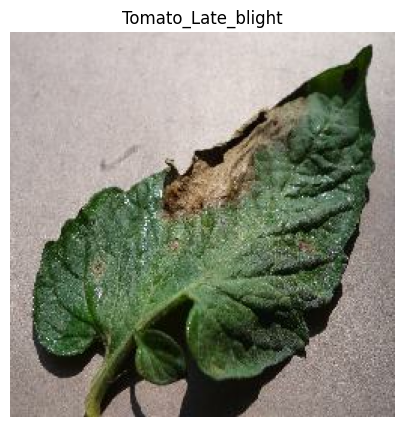

In [57]:
plt.figure(figsize=(5,5))
for image,label in testing.take(1):
    print(f"actual class name is :{class_name[label[0]]}")
    predicting = model.predict(image)
    pred_class = np.argmax(predicting[0])
    print(f"predicted class is {class_name[pred_class]}")
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(class_name[label[0]])
    plt.axis("off")
    print(len(image))

In [58]:
def image_prediction(model,image):
    image_array = tf.keras.preprocessing.image.img_to_array(image)
        # creating batch size
    batch_img = tf.expand_dims(image_array,0)
    predictions = model.predict(batch_img)
    
    pred_class = class_name[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return pred_class,confidence

1/1 [==============================] - 0s 47ms/step


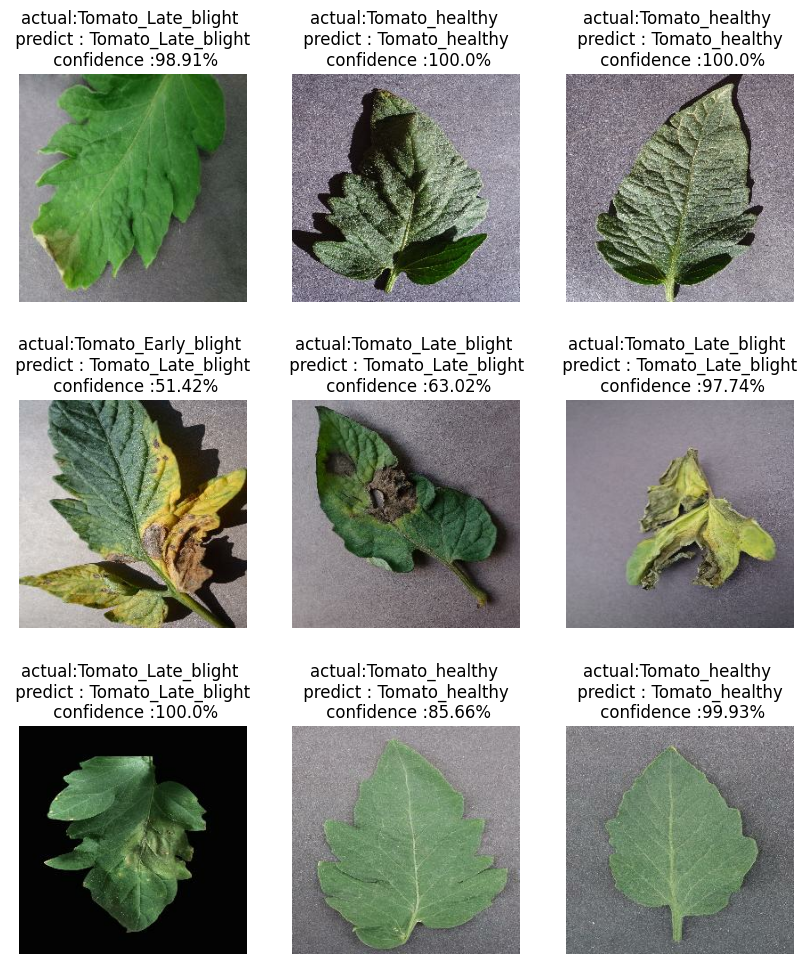

In [61]:
plt.figure(figsize=(10,12))
for batch_img ,label_img in testing.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(batch_img[i].numpy().astype('uint8'))
        
        pred_class,confidence = image_prediction(model,batch_img[i].numpy().astype('uint8'))
        plt.title(f"actual:{class_name[label_img[i]]} \n predict : {pred_class} \n confidence :{confidence}%")
        plt.axis("off")
    plt.show()

In [62]:
model.save?

Signature: model.save(filepath, overwrite=True, save_format=None, **kwargs)
Docstring:
Saves a model as a TensorFlow SavedModel or HDF5 file.

See the [Serialization and Saving guide](
    https://keras.io/guides/serialization_and_saving/) for details.

Args:
    model: Keras model instance to be saved.
    filepath: `str` or `pathlib.Path` object. Path where to save the
        model.
    overwrite: Whether we should overwrite any existing model at the
        target location, or instead ask the user via an interactive
        prompt.
    save_format: Either `"keras"`, `"tf"`, `"h5"`,
        indicating whether to save the model
        in the native Keras format (`.keras`),
        in the TensorFlow SavedModel format
        (referred to as "SavedModel" below),
        or in the legacy HDF5 format (`.h5`).
        Defaults to `"tf"` in TF 2.X, and `"h5"` in TF 1.X.

SavedModel format arguments:
    include_optimizer: Only applied to SavedModel and legacy HDF5
        formats. If Fals

In [63]:
model_version = 'Tommato_Train_model'
model.save(f"../Models/{model_version}")

INFO:tensorflow:Assets written to: ../Models/Tommato_Train_model\assets


INFO:tensorflow:Assets written to: ../Models/Tommato_Train_model\assets
